In [1]:
import numpy as np # linear algebra
import json
import cv2
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score
from sklearn.svm import SVC
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib


/usr/local/lib/python3.5/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
import zipfile
zip = zipfile.ZipFile('UTKFace.zip','r')
zip.extractall()

# import zipfile
# zip = zipfile.ZipFile('UTKFace.zip','r')
# zip.extractall()

FileNotFoundError: [Errno 2] No such file or directory: 'UTKFace.zip'

In [73]:

# # importing required modules 
# from zipfile import ZipFile 
  
# # specifying the zip file name 
# file_name = "UTKFace.zip"
  
# # opening the zip file in READ mode 
# with ZipFile(file_name, 'r') as zip: 
#     # printing all the contents of the zip file 
#     zip.printdir() 
  
#     # extracting all the files 
#     print('Extracting all the files now...') 
#     zip.extractall() 
#     print('Done!') 

In [4]:
root_path="/Users/caroline.p.w/Documents/UW/Course/2019 Spr/576/Project/Age-Prediction-master/HOG/"

In [5]:
#datalist=os.listdir("UTKFace")

datalist=os.listdir("crop_part1")


In [4]:
i=45
age=int(datalist[i].split("_")[0])
print(age)
print(datalist[i])
print(int(102/10))

80
80_1_0_20170110141723527.jpg.chip.jpg
10


# testing

10

In [6]:
datas=[]
lable=[]
ages=[]
img_length = 80

# os.chdir(root_path)
for i in range(len(datalist)):
    img = cv2.imread("crop_part1/"+datalist[i])
    if type(img) is np.ndarray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        rm = cv2.resize(img,(img_length,img_length))
        
        
        #----算对应的lable
        #age=abs(int(datalist[i].split("_")[1][:4])-int(datalist[i].split("_")[2][:4]))
        age=int(datalist[i].split("_")[0])
        duan=int(age/10)#取10~99
        if (duan>=1 and duan<=9):
            ages.append(age)
            lable.append(duan)
            datas.append(rm)



5

In [60]:
datas=[]
lable=[]
ages=[]
img_length = 80

# os.chdir(root_path)
for i in range(len(datalist)):
    img = cv2.imread("crop_part1/"+datalist[i])
    if type(img) is np.ndarray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        rm = cv2.resize(img,(img_length,img_length))
        
        
        #----算对应的lable
        #age=abs(int(datalist[i].split("_")[1][:4])-int(datalist[i].split("_")[2][:4]))
        age=int(datalist[i].split("_")[0])
        duan=int(age/5)#取5~99
        if (duan>=1 and duan<=19):
            ages.append(age)
            lable.append(duan)
            datas.append(rm)



20

In [76]:
datas=[]
lable=[]
ages=[]
img_length = 80

# os.chdir(root_path)
for i in range(len(datalist)):
    img = cv2.imread("crop_part1/"+datalist[i])
    if type(img) is np.ndarray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        rm = cv2.resize(img,(img_length,img_length))
        
        #----算对应的lable
        #age=abs(int(datalist[i].split("_")[1][:4])-int(datalist[i].split("_")[2][:4]))
        age=int(datalist[i].split("_")[0])
        duan=int(age/20)#取20~99
        if (duan>=1 and duan<=4):
            ages.append(age)
            lable.append(duan)
            datas.append(rm)



25

In [41]:
datas=[]
lable=[]
ages=[]
img_length = 80

# os.chdir(root_path)
for i in range(len(datalist)):
    img = cv2.imread("crop_part1/"+datalist[i])
    if type(img) is np.ndarray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        rm = cv2.resize(img,(img_length,img_length))
        
        #----算对应的lable
        #age=abs(int(datalist[i].split("_")[1][:4])-int(datalist[i].split("_")[2][:4]))
        age=int(datalist[i].split("_")[0])
        duan=int(age/25)#取25~99
        if (duan>=1 and duan<=3):
            ages.append(age)
            lable.append(duan)
            datas.append(rm)



In [77]:
duan=0
if (duan>=1 and duan<=19):
            print("yes/")

In [6]:
print(int(99/5))
# print(ages)
# print(lable)
print(len(lable))

print(lable)








19
6829
[3, 2, 1, 8, 8, 4, 6, 2, 3, 6, 3, 3, 1, 1, 1, 7, 5, 4, 1, 2, 4, 5, 9, 4, 6, 1, 4, 2, 6, 1, 6, 7, 3, 1, 1, 1, 8, 6, 2, 4, 1, 5, 1, 6, 1, 6, 2, 2, 2, 2, 2, 5, 1, 5, 3, 7, 5, 2, 6, 5, 3, 5, 4, 2, 1, 5, 4, 6, 3, 5, 1, 2, 1, 5, 3, 1, 5, 4, 5, 5, 1, 3, 6, 3, 5, 1, 1, 7, 3, 2, 3, 5, 3, 8, 2, 1, 1, 6, 9, 7, 6, 3, 7, 5, 6, 8, 2, 3, 3, 7, 2, 5, 5, 2, 2, 5, 2, 3, 3, 6, 3, 6, 4, 8, 7, 7, 2, 6, 7, 3, 6, 4, 3, 2, 5, 2, 3, 3, 5, 4, 6, 6, 7, 2, 5, 2, 6, 3, 5, 1, 1, 5, 7, 2, 2, 1, 4, 2, 1, 3, 8, 3, 4, 2, 4, 6, 1, 2, 6, 2, 6, 5, 6, 3, 3, 2, 1, 1, 5, 6, 2, 7, 8, 2, 5, 2, 4, 4, 6, 2, 7, 2, 7, 2, 3, 2, 2, 4, 1, 4, 3, 5, 2, 4, 1, 2, 2, 2, 1, 2, 7, 4, 6, 6, 3, 3, 6, 2, 2, 5, 1, 3, 2, 3, 1, 4, 6, 3, 3, 1, 3, 2, 1, 1, 7, 8, 1, 7, 2, 3, 8, 5, 6, 6, 5, 2, 3, 3, 4, 5, 2, 1, 3, 5, 2, 4, 1, 2, 5, 8, 1, 5, 5, 1, 5, 1, 2, 2, 5, 6, 1, 4, 5, 2, 3, 8, 2, 5, 1, 2, 3, 5, 2, 4, 1, 7, 1, 2, 8, 5, 5, 5, 4, 2, 3, 1, 3, 2, 2, 3, 3, 2, 1, 8, 6, 2, 6, 2, 4, 6, 5, 4, 5, 5, 8, 1, 1, 2, 2, 6, 2, 2, 2, 9, 5, 3, 2, 2, 2, 6, 6

In [15]:
# for i in range(len(ages)):
#     if ages[i]<5:
#         print("年龄为%d 第%d个"%(ages[i],i))

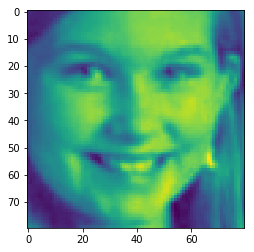

In [7]:
data_gray = [ color.rgb2gray(i) for i in datas]
plt.imshow(data_gray[2])

In [102]:
# print(len(hog_features))

In [8]:
ppc = 16
hog_images = []
hog_features = []
for image in data_gray:
    fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualise=True)
    hog_images.append(hog_image)
    hog_features.append(fd)
#     print("成功写入")
    

/usr/local/lib/python3.5/dist-packages/skimage/feature/_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


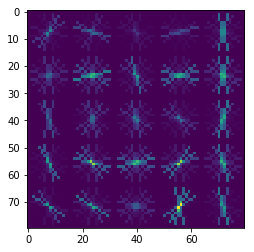

In [9]:
plt.imshow(hog_images[2])

In [9]:
# plt.imshow(data_gray)


lableAr=np.array(lable)

lableAr=lableAr.reshape(len(lable),1)


print(lable)
print(lableAr)

[3, 2, 1, 8, 8, 4, 6, 2, 3, 6, 3, 3, 1, 1, 1, 7, 5, 4, 1, 2, 4, 5, 9, 4, 6, 1, 4, 2, 6, 1, 6, 7, 3, 1, 1, 1, 8, 6, 2, 4, 1, 5, 1, 6, 1, 6, 2, 2, 2, 2, 2, 5, 1, 5, 3, 7, 5, 2, 6, 5, 3, 5, 4, 2, 1, 5, 4, 6, 3, 5, 1, 2, 1, 5, 3, 1, 5, 4, 5, 5, 1, 3, 6, 3, 5, 1, 1, 7, 3, 2, 3, 5, 3, 8, 2, 1, 1, 6, 9, 7, 6, 3, 7, 5, 6, 8, 2, 3, 3, 7, 2, 5, 5, 2, 2, 5, 2, 3, 3, 6, 3, 6, 4, 8, 7, 7, 2, 6, 7, 3, 6, 4, 3, 2, 5, 2, 3, 3, 5, 4, 6, 6, 7, 2, 5, 2, 6, 3, 5, 1, 1, 5, 7, 2, 2, 1, 4, 2, 1, 3, 8, 3, 4, 2, 4, 6, 1, 2, 6, 2, 6, 5, 6, 3, 3, 2, 1, 1, 5, 6, 2, 7, 8, 2, 5, 2, 4, 4, 6, 2, 7, 2, 7, 2, 3, 2, 2, 4, 1, 4, 3, 5, 2, 4, 1, 2, 2, 2, 1, 2, 7, 4, 6, 6, 3, 3, 6, 2, 2, 5, 1, 3, 2, 3, 1, 4, 6, 3, 3, 1, 3, 2, 1, 1, 7, 8, 1, 7, 2, 3, 8, 5, 6, 6, 5, 2, 3, 3, 4, 5, 2, 1, 3, 5, 2, 4, 1, 2, 5, 8, 1, 5, 5, 1, 5, 1, 2, 2, 5, 6, 1, 4, 5, 2, 3, 8, 2, 5, 1, 2, 3, 5, 2, 4, 1, 7, 1, 2, 8, 5, 5, 5, 4, 2, 3, 1, 3, 2, 2, 3, 3, 2, 1, 8, 6, 2, 6, 2, 4, 6, 5, 4, 5, 5, 8, 1, 1, 2, 2, 6, 2, 2, 2, 9, 5, 3, 2, 2, 2, 6, 6, 1, 3, 

In [11]:

hog_features = np.array(hog_features)
data_frame = np.hstack((hog_features,lableAr))
np.random.shuffle(data_frame)


In [27]:
# plt.imshow(hog_images[1])
print(hog_features.shape)
print(fd.shape)

(6829, 512)
(512,)


原

In [12]:
#What percentage of data you want to keep for training
percentage = 80
partition = int(len(hog_features)*percentage/100)

x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()


新

In [13]:
#What percentage of data you want to keep for training
percentage = 80
partition = int(len(hog_features)*percentage/100)

Vpercentage = 0.5


x_train, x_test = data_frame[:partition,:-1],  data_frame[partition:,:-1]
y_train, y_test = data_frame[:partition,-1:].ravel() , data_frame[partition:,-1:].ravel()

In [14]:

a = int(len(x_test)*Vpercentage)

x_Val=x_test[:a]
y_Val=y_test[:a]

x_T2=x_test[a:]
y_T2=y_test[a:]

In [25]:
print(x_train.shape)

(5463, 512)


In [86]:
print(y_test.shape)
print(y_Val.shape)

(1123,)
(561,)


In [87]:
print(len(hog_features))
print(partition)

5611
4488


In [15]:


#clf = SVC(gamma='auto')

clf = svm.SVC()

# tuned_parameters = {'kernel':['rbf'], 'gamma':[1e-4,1e-2,1e-4], 'C':[0.01, 0.1, 1, 10, 100]}
# clf = GridSearchCV(SVC(), tuned_parameters)

clf=svm.SVC(gamma='scale', decision_function_shape='ovo')



In [134]:
# dec = clf.decision_function([[x_train[1]]])

In [16]:
clf.fit(x_train,y_train)
# y_pred = clf.predict(x_test)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
y_pred = clf.predict(x_test)

In [19]:
joblib.dump(clf, "train_model.m")

['train_model.m']

In [20]:
clf2=joblib.load("train_model.m")
clf2.predit(test_X) #此处test_X为特征集

AttributeError: 'SVC' object has no attribute 'predit'

In [18]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.41142020497803805


              precision    recall  f1-score   support

         1.0       0.51      0.62      0.56       221
         2.0       0.49      0.67      0.57       310
         3.0       0.40      0.37      0.39       228
         4.0       0.13      0.05      0.07       128
         5.0       0.32      0.44      0.37       194
         6.0       0.26      0.17      0.20       127
         7.0       0.60      0.07      0.13        81
         8.0       0.27      0.29      0.28        58
         9.0       0.00      0.00      0.00        19

    accuracy                           0.41      1366
   macro avg       0.33      0.30      0.28      1366
weighted avg       0.39      0.41      0.38      1366



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [136]:
y_pred_Val = clf.predict(x_Val)

In [137]:
print("Accuracy: "+str(accuracy_score(y_Val, y_pred_Val)))
print('\n')
print(classification_report(y_Val, y_pred_Val))

Accuracy: 0.6114081996434938


              precision    recall  f1-score   support

         1.0       0.72      0.85      0.78       254
         2.0       0.41      0.47      0.44       154
         3.0       0.62      0.41      0.50       122
         4.0       0.71      0.16      0.26        31

    accuracy                           0.61       561
   macro avg       0.62      0.47      0.49       561
weighted avg       0.61      0.61      0.60       561



In [29]:
# # print(y_test[:100])
# print("y_val")
# print("原本   结果")
# for i in range (100):
#     if((y_test[i]==y_pred[i])):
#         print("%d      %d------%d" %(y_Val[i],y_pred_Val[i],(y_Val[i]==y_pred_Val[i])))
#     else:
#         print('\033[1;35m%d      %d\033[0m------%d'%(y_Val[i],y_pred_Val[i],(y_Val[i]==y_pred_Val[i])))

In [71]:

Class=1;

for y in range(9):
    Class=y+1
    countT=0
    countM=0
    for i in range (len(y_test)):
        if(y_test[i]==Class):
            countT=countT+1
            if(y_test[i]==y_pred[i]):
                countM=countM+1
#     print("Class: %d %d count %d accuracy %f" %(Class,countT,countM,countM/countT))
#     print("Class: %d sum: %d match %d accuracy %f" %(Class,countT,countM,countM/countT))
    print("Class: %d-%d sum: %d match %d accuracy %f" %(Class*10,Class*10+9,countT,countM,countM/countT))
print("Overall accuracy: %f" % accuracy_score(y_test, y_pred))

Class: 10-19 sum: 242 match 147 accuracy 0.607438
Class: 20-29 sum: 294 match 204 accuracy 0.693878
Class: 30-39 sum: 204 match 69 accuracy 0.338235
Class: 40-49 sum: 147 match 4 accuracy 0.027211
Class: 50-59 sum: 186 match 84 accuracy 0.451613
Class: 60-69 sum: 124 match 17 accuracy 0.137097
Class: 70-79 sum: 75 match 8 accuracy 0.106667
Class: 80-89 sum: 77 match 14 accuracy 0.181818
Class: 90-99 sum: 17 match 0 accuracy 0.000000
Overall accuracy: 0.400439


In [58]:
# Class=1;


# Class=4
# countT=0
# countM=0
# count5=0
# count6=0
# count3=0
# count2=0
# count1=0
# for i in range (len(y_test)):
#     if(y_test[i]==Class):
#         countT=countT+1
#         if(y_test[i]==y_pred[i]):
#             countM=countM+1
#         else:
#             print(y_pred[i])
            
# #     print("Class: %d %d count %d accuracy %f" %(Class,countT,countM,countM/countT))
# print("Class: %d sum: %d match %d accuracy %f" %(Class,countT,countM,countM/countT))

In [ ]:
img_length = 80

# os.chdir(root_path)
testdata=os.listdir("test")
    img = cv2.imread("test/"+datalist[i])
    if type(img) is np.ndarray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        rm = cv2.resize(img,(img_length,img_length))

image = plt.imshow(data_gray[2])
fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualise=True)





In [77]:
testdata=os.listdir("test")
print(testdata)

['test5.png', 'test1.png', 'test4.png']


In [23]:


# print(y_pred[:200])

# print(datalist[1])

print("原本   结果")
for i in range (100):
    if((y_test[i]==y_pred[i])):
        print("%d      %d------%d" %(y_test[i],y_pred[i],(y_test[i]==y_pred[i])))
    else:
        print('\033[1;35m%d      %d\033[0m------%d'%(y_test[i],y_pred[i],(y_test[i]==y_pred[i])))
        

原本   结果
2      2------1
7      5------0
9      7------0
1      1------1
5      1------0
2      2------1
4      3------0
5      1------0
1      2------0
2      3------0
7      7------1
1      2------0
1      5------0
5      3------0
6      1------0
4      5------0
7      5------0
5      6------0
1      1------1
8      5------0
2      2------1
5      5------1
4      3------0
7      1------0
2      2------1
5      5------1
5      2------0
2      2------1
2      2------1
2      2------1
3      2------0
1      2------0
2      1------0
7      5------0
8      6------0
7      4------0
3      3------1
2      5------0
1      1------1
8      2------0
2      2------1
7      8------0
2      2------1
6      5------0
2      3------0
5      5------1
5      2------0
5      5------1
2      2------1
5      5------1
6      5------0
1      3------0
2      2------1
1      1------1
2      2------1
3      3------1
8      6------0
6      2------0
8      6------0
3      2------0
5      1------0
8      5------0


In [63]:
# f = open('shipsnet.json')
# dataset = json.load(f)
# f.close()

# dataset.keys()

In [30]:
# labels =  np.array(dataset['labels']).reshape(len(dataset['labels']),1)

In [39]:
# print(labels[500:1000])

In [99]:
# import numpy as np
# X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
# y = np.array([1, 1, 2, 2])
# from sklearn.svm import SVC
# clf = SVC(gamma='auto')
# clf.fit(X, y) 
# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
#     max_iter=-1, probability=False, random_state=None, shrinking=True,
#     tol=0.001, verbose=False)


In [72]:


# from sklearn.ensemble import RandomForestClassifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)


mod = RandomForestClassifier(n_estimators=200, random_state=28)
mod.fit(x_train,y_train)
# y_pred_Val = mod.predict(x_Val)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=28, verbose=0,
                       warm_start=False)

In [73]:
y_pred=mod.predict(x_test)

In [130]:
print("Accuracy: "+str(accuracy_score(y_Val, y_pred_Val)))
print('\n')
print(classification_report(y_Val, y_pred_Val))

Accuracy: 0.5846702317290553


              precision    recall  f1-score   support

         1.0       0.66      0.89      0.76       254
         2.0       0.45      0.47      0.46       154
         3.0       0.52      0.21      0.30       122
         4.0       0.50      0.06      0.11        31

    accuracy                           0.58       561
   macro avg       0.53      0.41      0.41       561
weighted avg       0.56      0.58      0.54       561



In [132]:
print("Accuracy: "+str(accuracy_score(y_Val, y_pred_Val)))
print('\n')
print(classification_report(y_Val, y_pred_Val))

Accuracy: 0.5668449197860963


              precision    recall  f1-score   support

         1.0       0.66      0.87      0.75       254
         2.0       0.41      0.45      0.43       154
         3.0       0.47      0.18      0.26       122
         4.0       0.67      0.13      0.22        31

    accuracy                           0.57       561
   macro avg       0.55      0.41      0.41       561
weighted avg       0.55      0.57      0.53       561



In [66]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.35724743777452417


              precision    recall  f1-score   support

         1.0       0.47      0.48      0.47       242
         2.0       0.41      0.72      0.52       294
         3.0       0.27      0.22      0.24       204
         4.0       0.14      0.02      0.04       147
         5.0       0.27      0.45      0.33       186
         6.0       0.23      0.11      0.15       124
         7.0       0.47      0.12      0.19        75
         8.0       0.29      0.10      0.15        77
         9.0       0.00      0.00      0.00        17

    accuracy                           0.36      1366
   macro avg       0.28      0.25      0.23      1366
weighted avg       0.33      0.36      0.31      1366



/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [74]:

Class=1;

for y in range(9):
    Class=y+1
    countT=0
    countM=0
    for i in range (len(y_test)):
        if(y_test[i]==Class):
            countT=countT+1
            if(y_test[i]==y_pred[i]):
                countM=countM+1
#     print("Class: %d %d count %d accuracy %f" %(Class,countT,countM,countM/countT))
#     print("Class: %d sum: %d match %d accuracy %f" %(Class,countT,countM,countM/countT))
    print("Class: %d-%d sum: %d match %d accuracy %f" %(Class*10,Class*10+9,countT,countM,countM/countT))
print("Overall accuracy: %f" % accuracy_score(y_test, y_pred))

Class: 10-19 sum: 242 match 116 accuracy 0.479339
Class: 20-29 sum: 294 match 211 accuracy 0.717687
Class: 30-39 sum: 204 match 44 accuracy 0.215686
Class: 40-49 sum: 147 match 3 accuracy 0.020408
Class: 50-59 sum: 186 match 83 accuracy 0.446237
Class: 60-69 sum: 124 match 14 accuracy 0.112903
Class: 70-79 sum: 75 match 9 accuracy 0.120000
Class: 80-89 sum: 77 match 8 accuracy 0.103896
Class: 90-99 sum: 17 match 0 accuracy 0.000000
Overall accuracy: 0.357247


In [139]:


# print(y_pred[:200])

# print(datalist[1])

print("原本   结果")
for i in range (100):
    if((y_test[i]==y_pred[i])):
        print("%d      %d------%d" %(y_test[i],y_pred[i],(y_test[i]==y_pred[i])))
    else:
        print('\033[1;35m%d      %d\033[0m------%d'%(y_test[i],y_pred[i],(y_test[i]==y_pred[i])))

原本   结果
4      3------0
1      1------1
2      2------1
1      1------1
2      1------0
2      2------1
1      1------1
4      3------0
2      2------1
1      1------1
1      2------0
1      1------1
3      4------0
3      2------0
2      1------0
1      1------1
1      1------1
3      3------1
2      2------1
1      1------1
1      1------1
2      2------1
1      1------1
1      1------1
1      1------1
1      1------1
2      1------0
1      1------1
2      1------0
2      1------0
2      1------0
1      1------1
1      1------1
2      1------0
1      1------1
3      2------0
1      1------1
2      3------0
2      2------1
1      1------1
2      3------0
4      2------0
2      2------1
3      3------1
1      2------0
2      2------1
3      1------0
2      2------1
2      2------1
1      2------0
1      1------1
1      1------1
1      1------1
1      1------1
1      1------1
3      1------0
2      1------0
3      1------0
1      1------1
2      1------0
1      1------1
4      3------0
